# Avacado Project
 
 
 Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [1]:
# import libraries into python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visulalization
from sklearn.model_selection import train_test_split # to split the data into training and validation
%matplotlib inline


In [2]:
data=pd.read_csv("E:works\\16\\avocado.csv") #reading the data set

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.columns #reading coulmns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
data1=data[[ 'AveragePrice', 'Total Volume',
        'Total Bags', 'Small Bags', 'Large Bags']] 

In [6]:
data1.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags
0,1.33,64236.62,8696.87,8603.62,93.25
1,1.35,54876.98,9505.56,9408.07,97.49
2,0.93,118220.22,8145.35,8042.21,103.14
3,1.08,78992.15,5811.16,5677.40,133.76
4,1.28,51039.60,6183.95,5986.26,197.69


In [7]:
cor=data1.corr()

In [8]:
cor

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags
AveragePrice,1.000000,-0.140470,-0.111597,-0.097682,-0.177480
Total Volume,-0.140470,1.000000,0.967689,0.960642,0.910226
Total Bags,-0.111597,0.967689,1.000000,0.997341,0.911336
Small Bags,-0.097682,0.960642,0.997341,1.000000,0.879131
Large Bags,-0.177480,0.910226,0.911336,0.879131,1.000000


Heatmap

<AxesSubplot:>

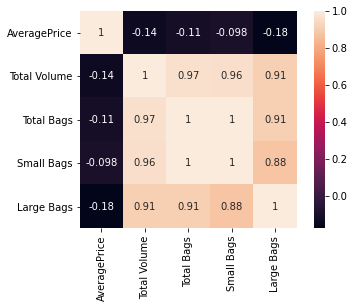

In [9]:
sns.heatmap(cor,annot=True,square=True)

In [10]:
data1.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags'],
      dtype='object')

In [11]:
abs(cor['Total Volume'])>0.5

AveragePrice    False
Total Volume     True
Total Bags       True
Small Bags       True
Large Bags       True
Name: Total Volume, dtype: bool

In [12]:
#Correlation with output variable
cor_target = abs(cor['Total Volume'])

In [13]:
cor_target

AveragePrice    0.140470
Total Volume    1.000000
Total Bags      0.967689
Small Bags      0.960642
Large Bags      0.910226
Name: Total Volume, dtype: float64

In [14]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Total Volume    1.000000
Total Bags      0.967689
Small Bags      0.960642
Large Bags      0.910226
Name: Total Volume, dtype: float64

In [15]:
relevant_features.index

Index(['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags'], dtype='object')

In [16]:
data2=data1[relevant_features.index]

In [17]:
data2

,Total Volume,Total Bags,Small Bags,Large Bags
0,64236.62,8696.87,8603.62,93.25
1,54876.98,9505.56,9408.07,97.49
2,118220.22,8145.35,8042.21,103.14
3,78992.15,5811.16,5677.40,133.76
4,51039.60,6183.95,5986.26,197.69
...,...,...,...,...
1512,190846.01,59418.46,48823.53,10354.65
1513,178235.75,63300.70,54704.14,8596.56
1514,178410.82,62415.77,53332.61,8258.16
1515,189131.52,63931.73,55653.47,8278.26


In [18]:
def pair_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        abc=np.corrcoef(input_data[dependent_col],x_vars[xvar_names[i]])[1][0]
        print (xvar_names[i], " pairwisee = " , abc)

In [19]:
pair_cal(input_data=data2,dependent_col='Total Volume')

Total Bags  pairwisee =  0.9676892498051687
Small Bags  pairwisee =  0.9606418113417272
Large Bags  pairwisee =  0.9102257162378916


In [20]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data1,test_size=0.2,random_state=0)

In [21]:
x_train=train.drop(['Total Volume'],1)
y_train=train['Total Volume']
x_test=test.drop(['Total Volume'],1)
y_test=test['Total Volume']

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr.score(x_train,y_train)

0.9409204250503659

In [24]:
lr.coef_

array([-4.60951816e+05, -3.73740931e+01,  4.26320211e+01,  4.67909442e+01])

In [25]:
list(zip(x_train.columns,lr.coef_))

[('AveragePrice', -460951.81639090314),
 ('Total Bags', -37.374093074660195),
 ('Small Bags', 42.63202111293056),
 ('Large Bags', 46.79094418633441)]

In [26]:
from sklearn.linear_model import LassoCV
ls1=LassoCV()
ls1.fit(x_train,y_train)

LassoCV()

In [27]:
ls1.alpha_

3233265610.4911246

In [28]:
ls1.alphas_

array([3.23326561e+12, 3.01535433e+12, 2.81212954e+12, 2.62260142e+12,
       2.44584686e+12, 2.28100497e+12, 2.12727287e+12, 1.98390180e+12,
       1.85019346e+12, 1.72549661e+12, 1.60920391e+12, 1.50074896e+12,
       1.39960350e+12, 1.30527491e+12, 1.21730375e+12, 1.13526155e+12,
       1.05874872e+12, 9.87392600e+11, 9.20845643e+11, 8.58783729e+11,
       8.00904580e+11, 7.46926292e+11, 6.96585959e+11, 6.49638397e+11,
       6.05854943e+11, 5.65022348e+11, 5.26941733e+11, 4.91427624e+11,
       4.58307046e+11, 4.27418685e+11, 3.98612097e+11, 3.71746975e+11,
       3.46692473e+11, 3.23326561e+11, 3.01535433e+11, 2.81212954e+11,
       2.62260142e+11, 2.44584686e+11, 2.28100497e+11, 2.12727287e+11,
       1.98390180e+11, 1.85019346e+11, 1.72549661e+11, 1.60920391e+11,
       1.50074896e+11, 1.39960350e+11, 1.30527491e+11, 1.21730375e+11,
       1.13526155e+11, 1.05874872e+11, 9.87392600e+10, 9.20845643e+10,
       8.58783729e+10, 8.00904580e+10, 7.46926292e+10, 6.96585959e+10,
      